In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
path = "Dataset.xlsx"

In [3]:
file = pd.ExcelFile(path)

dfs = {sheet_name: file.parse(sheet_name) 
          for sheet_name in file.sheet_names}

In [4]:
dfs.keys()

dict_keys(['Material_Data_Dict', 'Comp_Data_Dict', 'CS', 'SS(Ave)', 'SS1', 'SS2', 'FE', 'AT1', 'AT2', 'AT3', 'AT4', 'AT5', 'AT(Ave)'])

In [5]:
class DataCleaner:
    
    def __init__(self, path):
        file = pd.ExcelFile(path)
        dfs = {sheet_name: file.parse(sheet_name) 
          for sheet_name in file.sheet_names}
        self.dfs = dfs
        colsa = ['BOD','NH3-N','PH','TN'] # ss avg columns
        colsb = ['MLSS', 'AT_Temp'] # at avg columns
        self.df = pd.concat([ dfs['SS(Ave)'][colsa] , dfs['AT(Ave)'][colsb] ], axis = 1)
        self.odf = dfs['FE'][['BOD', "NH3-N", 'TN']]
    
    def get_bod(self):
        dfs = self.dfs
        self.bod = dfs['FE']['BOD']
        self.bod = self.bod.rename('BOD_Y')
        return self.bod
        #display(self.bod)
    def get_nh3(self):
        dfs = self.dfs
        self.nh3 = dfs['FE']['NH3-N']
        self.nh3 = self.nh3.rename('NH3_Y')
        return self.nh3
        #display(self.nh3)
    def get_tn(self):
        dfs = self.dfs
        self.tn = dfs['FE']['TN']
        self.tn = self.bod.rename('TN_Y')
        return self.tn
        #display(self.tn)
        
    def first_df(self):
        return pd.concat([self.df, self.get_bod()], axis = 1)
    def second_df(self):
        return pd.concat([self.df, self.get_nh3()], axis = 1)
    def third_df(self):
        return pd.concat([self.df, self.get_tn()], axis = 1)
        

In [6]:
dc = DataCleaner(path)
dc.df

,BOD,NH3-N,PH,TN,MLSS,AT_Temp
0,NaN,25.0,7.4,NaN,NaN,21.350
1,NaN,NaN,NaN,NaN,2540.0,21.850
2,120.0,31.0,8.1,45.0,NaN,22.400
3,NaN,NaN,NaN,NaN,2230.0,21.975
4,NaN,NaN,NaN,NaN,NaN,21.100
...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150
2187,NaN,NaN,NaN,NaN,3330.0,21.925
2188,NaN,NaN,NaN,NaN,NaN,21.075
2189,NaN,29.0,7.2,NaN,NaN,20.700


In [7]:
ind = dc.get_bod().notna()
ind

0        True
1       False
2        True
3       False
4       False
        ...  
2186     True
2187    False
2188    False
2189    False
2190    False
Name: BOD_Y, Length: 2191, dtype: bool

In [8]:
dc.odf[ind]

,BOD,NH3-N,TN
0,5.0,0.50,9.4
2,5.0,0.54,11.0
7,5.0,0.59,8.9
8,5.0,0.70,NaN
9,5.0,0.98,12.0
...,...,...,...
2178,5.0,0.50,NaN
2179,5.0,0.50,4.7
2184,5.0,0.50,3.9
2185,5.0,0.50,NaN


In [9]:
df1 = dc.first_df()
df2 = dc.second_df()
df3 = dc.third_df()
display(df1)
display(df2)
display(df3)

,BOD,NH3-N,PH,TN,MLSS,AT_Temp,BOD_Y
0,NaN,25.0,7.4,NaN,NaN,21.350,5.0
1,NaN,NaN,NaN,NaN,2540.0,21.850,NaN
2,120.0,31.0,8.1,45.0,NaN,22.400,5.0
3,NaN,NaN,NaN,NaN,2230.0,21.975,NaN
4,NaN,NaN,NaN,NaN,NaN,21.100,NaN
...,...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150,5.0
2187,NaN,NaN,NaN,NaN,3330.0,21.925,NaN
2188,NaN,NaN,NaN,NaN,NaN,21.075,NaN
2189,NaN,29.0,7.2,NaN,NaN,20.700,NaN


,BOD,NH3-N,PH,TN,MLSS,AT_Temp,NH3_Y
0,NaN,25.0,7.4,NaN,NaN,21.350,0.50
1,NaN,NaN,NaN,NaN,2540.0,21.850,NaN
2,120.0,31.0,8.1,45.0,NaN,22.400,0.54
3,NaN,NaN,NaN,NaN,2230.0,21.975,NaN
4,NaN,NaN,NaN,NaN,NaN,21.100,NaN
...,...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150,0.50
2187,NaN,NaN,NaN,NaN,3330.0,21.925,NaN
2188,NaN,NaN,NaN,NaN,NaN,21.075,NaN
2189,NaN,29.0,7.2,NaN,NaN,20.700,0.50


,BOD,NH3-N,PH,TN,MLSS,AT_Temp,TN_Y
0,NaN,25.0,7.4,NaN,NaN,21.350,5.0
1,NaN,NaN,NaN,NaN,2540.0,21.850,NaN
2,120.0,31.0,8.1,45.0,NaN,22.400,5.0
3,NaN,NaN,NaN,NaN,2230.0,21.975,NaN
4,NaN,NaN,NaN,NaN,NaN,21.100,NaN
...,...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150,5.0
2187,NaN,NaN,NaN,NaN,3330.0,21.925,NaN
2188,NaN,NaN,NaN,NaN,NaN,21.075,NaN
2189,NaN,29.0,7.2,NaN,NaN,20.700,NaN


In [10]:
df1.columns

Index(['BOD', 'NH3-N', 'PH', 'TN', 'MLSS', 'AT_Temp', 'BOD_Y'], dtype='object')

<AxesSubplot:>

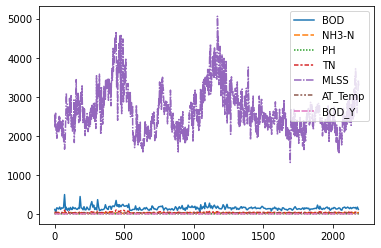

In [11]:
sns.lineplot(data = dc.first_df())

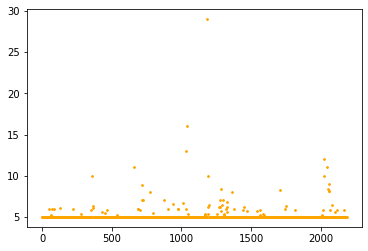

In [12]:
#plt.plot(df1.index, df1['BOD_Y'])
plt.scatter(df1.index, df1['BOD_Y'], s = 3, color = 'orange')
plt.show()

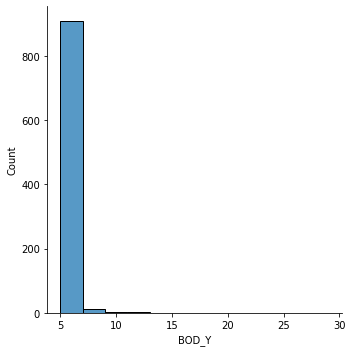

In [13]:
sns.displot(df1, x = "BOD_Y", binwidth=2) # DATA IS HIGHLY IMBALANCED

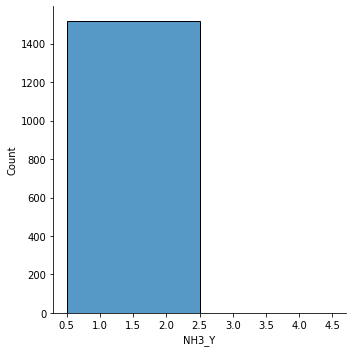

In [14]:
sns.displot(df2, x = "NH3_Y", binwidth=2) # DATA IS BALANCED

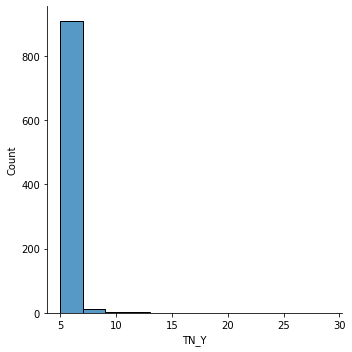

In [15]:
sns.displot(df3, x = "TN_Y", binwidth=2) # DATA IS HIGHLY IMBALANCED

In [16]:
from imblearn.over_sampling import SMOTE

x = df1.drop("BOD_Y", axis = 1, inplace = False)
y = pd.DataFrame(df1["BOD_Y"])

display(x)
display(y)

,BOD,NH3-N,PH,TN,MLSS,AT_Temp
0,NaN,25.0,7.4,NaN,NaN,21.350
1,NaN,NaN,NaN,NaN,2540.0,21.850
2,120.0,31.0,8.1,45.0,NaN,22.400
3,NaN,NaN,NaN,NaN,2230.0,21.975
4,NaN,NaN,NaN,NaN,NaN,21.100
...,...,...,...,...,...,...
2186,120.0,31.0,7.3,56.0,3430.0,23.150
2187,NaN,NaN,NaN,NaN,3330.0,21.925
2188,NaN,NaN,NaN,NaN,NaN,21.075
2189,NaN,29.0,7.2,NaN,NaN,20.700


,BOD_Y
0,5.0
1,NaN
2,5.0
3,NaN
4,NaN
...,...
2186,5.0
2187,NaN
2188,NaN
2189,NaN


In [87]:
ind = y['BOD_Y'].notna()
ind
x = x[ind]
y = y[ind]
y = np.ceil(y)
display(x)
display(y)

,BOD,NH3-N,PH,TN,MLSS,AT_Temp
0,0.0,25.0,7.4,0.0,0.0,21.350
2,120.0,31.0,8.1,45.0,0.0,22.400
7,0.0,28.0,7.9,0.0,2570.0,22.300
8,0.0,28.0,8.1,0.0,2580.0,21.900
9,38.0,25.0,8.3,48.0,2250.0,22.150
...,...,...,...,...,...,...
2178,0.0,40.0,7.2,0.0,2730.0,24.975
2179,180.0,30.0,7.2,48.0,2830.0,25.525
2184,0.0,35.0,7.3,0.0,0.0,23.475
2185,0.0,29.0,7.3,0.0,0.0,23.725


,BOD_Y
0,5.0
2,5.0
7,5.0
8,5.0
9,5.0
...,...
2178,5.0
2179,5.0
2184,5.0
2185,5.0


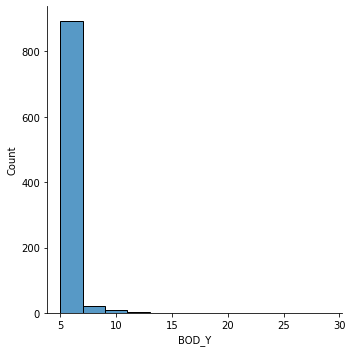

In [88]:
sns.displot(y, x = "BOD_Y", binwidth=2) # DATA IS HIGHLY IMBALANCED

In [108]:
ind = y["BOD_Y"]<=8
x = x[ind]
y = y[ind]
display(x)
display(y)

,BOD,NH3-N,PH,TN,MLSS,AT_Temp
0,0.0,25.0,7.4,0.0,0.0,21.350
2,120.0,31.0,8.1,45.0,0.0,22.400
7,0.0,28.0,7.9,0.0,2570.0,22.300
8,0.0,28.0,8.1,0.0,2580.0,21.900
9,38.0,25.0,8.3,48.0,2250.0,22.150
...,...,...,...,...,...,...
2178,0.0,40.0,7.2,0.0,2730.0,24.975
2179,180.0,30.0,7.2,48.0,2830.0,25.525
2184,0.0,35.0,7.3,0.0,0.0,23.475
2185,0.0,29.0,7.3,0.0,0.0,23.725


,BOD_Y
0,5.0
2,5.0
7,5.0
8,5.0
9,5.0
...,...
2178,5.0
2179,5.0
2184,5.0
2185,5.0


In [110]:
xr, yr = SMOTE(k_neighbors=3).fit_resample(x, y)

In [114]:
yr

,BOD_Y
0,5.0
1,5.0
2,5.0
3,5.0
4,5.0
...,...
3387,8.0
3388,8.0
3389,8.0
3390,8.0


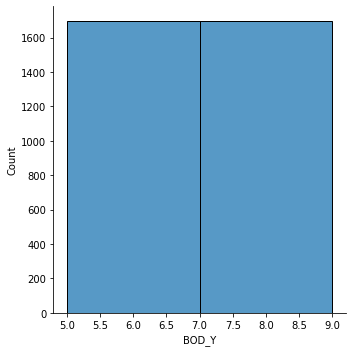

In [115]:
sns.displot(yr, x = "BOD_Y", binwidth=2) # DATA IS HIGHLY IMBALANCED